# HW 7-1: Bjerrum plot
Assume T = 20°C, S = 35 PSU, DIC = 2000 umol/kg.
Vary TA between 10 and 4000 umol/kg.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import xarray as xr
import pandas as pd
import scipy
from datetime import datetime, timedelta
import time
import seaborn
import matplotlib.dates as mdates
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
import math
import netCDF4 as nc
import requests

# Import K's code for calculating the coefficients of the carb system
import calc_coeffs as co2
import H_poly as hpoly
import H_poly2 as hpoly2
from importlib import reload
import warnings
# warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import carbon as carbon

TA = np.arange(10,5000,10)
T = np.zeros(TA.size)
T[:] = 20
S = np.zeros(TA.size)
S[:] = 35
DIC = np.zeros(TA.size)
DIC[:] = 2000

results = carbon.solver(TA = TA, temperature = T, salinity = S, DIC = DIC, pHlo = 1, pHhi = 14)

/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:602: RuntimeWarning: divide by zero encountered in true_divide
  Revelle = (3 * TA * DIC - 2 * DIC**2)/((2*DIC - TA)*(TA - DIC))


Text(0.5, 0, 'pH')

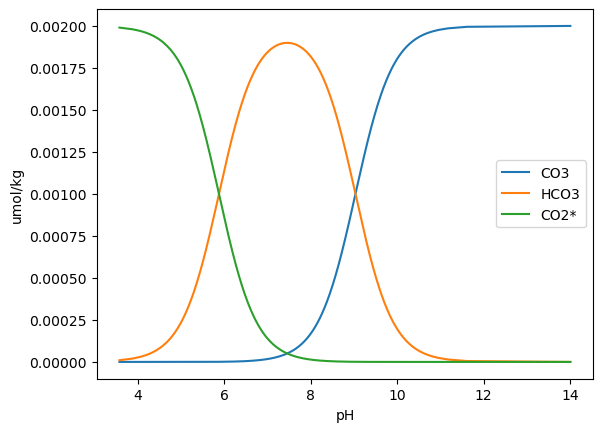

In [3]:
fig, ax = plt.subplots()

ax.plot(results['pH'], results['[CO3]'], label = 'CO3')
ax.plot(results['pH'], results['[HCO3]'], label = 'HCO3')
ax.plot(results['pH'], results['[CO2*]'], label = 'CO2*')
ax.legend()
ax.set_ylabel('umol/kg')
ax.set_xlabel('pH')

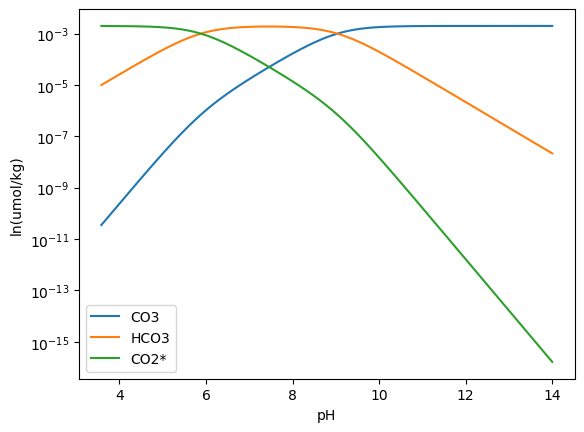

In [4]:
fig, ax = plt.subplots()

ax.plot(results['pH'], results['[CO3]'], label = 'CO3')
ax.plot(results['pH'], results['[HCO3]'], label = 'HCO3')
ax.plot(results['pH'], results['[CO2*]'], label = 'CO2*')
ax.legend()
ax.set_ylabel('ln(umol/kg)')
ax.set_xlabel('pH')
ax.set_yscale('log')